In [1]:
import pandas as pd

In [2]:
latest_navcen=pd.read_csv('NAVCEN_16aug2025.csv')

In [3]:
latest_navcen

,Index,Disruption Date,Location,Type,Description,Cause,Closed Date
0,758,10/16/2025,"Easton, Maryland",Automobile,"USER: Upon entering zone listed above, gps dir...",Mapping Issue,10/21/2024
1,886,07/20/2025,Strait Of Hormuz,Marine,USER: During Strait of Hormuz passage vessel e...,Unknown Interference,07/28/2025
2,883,07/19/2025,Hormuz Straight,NaN,USER: GPS Spoofing at hormoz straits\nNAVCEN: ...,Unknown Interference,07/28/2025
3,880,07/14/2025,Southern Red Sea,Marine,USER: Lack of fix possition. Spoofing experien...,Unknown Interference,07/21/2025
4,879,07/12/2025,"JEDDAH, Saudi Arabia",Marine,USER: 12th July 2025 at 1651 utc in position 2...,Unknown Interference,07/21/2025
...,...,...,...,...,...,...,...
713,8,01/05/2017,Chile,Law Enforcement,User: There were large spikes in geozone alarm...,User Equipment,05/20/2019
714,20,01/03/2017,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019
715,1,01/02/2017,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019
716,2,01/01/2017,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019


<Axes: ylabel='Type'>

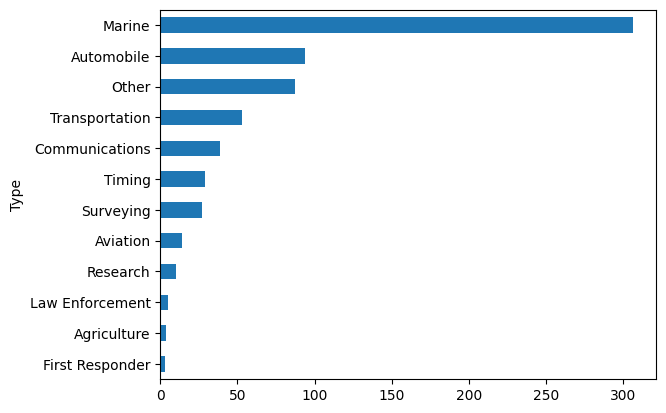

In [4]:
(latest_navcen
    .Type
    .value_counts()
    .sort_values(ascending=True)
    .plot(kind='barh')
)

<Axes: ylabel='Cause'>

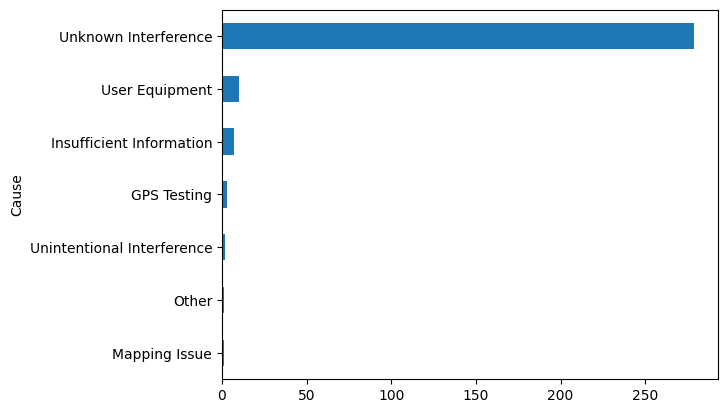

In [5]:
(latest_navcen
    .query('Type=="Marine"')
    .Cause
    .value_counts()
    .sort_values(ascending=True)
    .plot(kind='barh')
)

<Axes: ylabel='Location'>

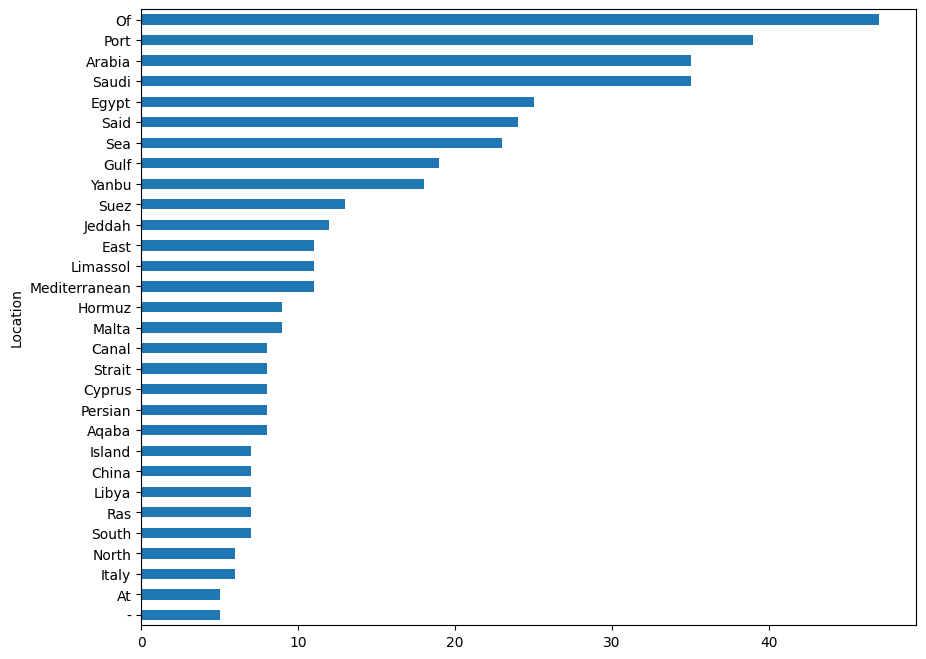

In [6]:
(latest_navcen
    .query('Type=="Marine" and Cause=="Unknown Interference"')
    .Location
    .str.split()
    .explode()
    .str.strip(',')
    .str.title()
    .value_counts()
    .sort_values(ascending=False)
    .iloc[0:30]
    .sort_values(ascending=True)
    .plot(kind='barh',figsize=[10,8])
)

<Axes: ylabel='Location'>

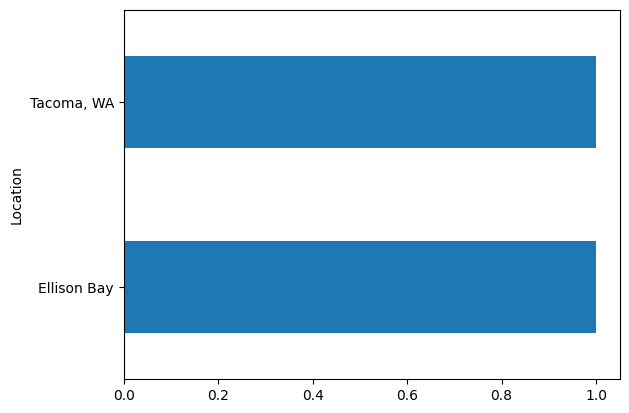

In [7]:
(latest_navcen
    .query('Type=="Marine" and Cause=="Unintentional Interference"')
    .Location
    .value_counts()
    .plot(kind='barh')
)

<Axes: ylabel='Location'>

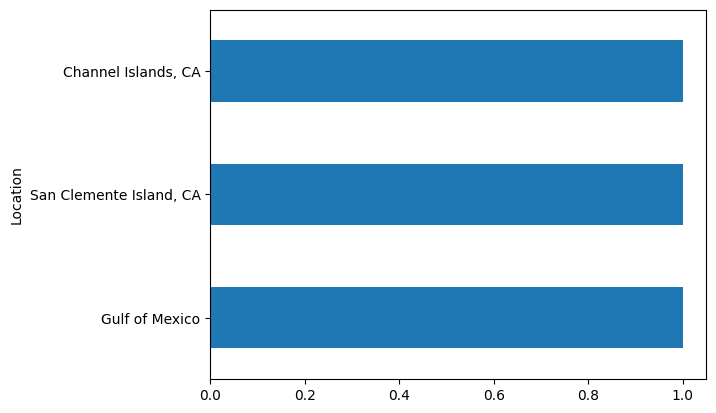

In [8]:
(latest_navcen
    .query('Type=="Marine" and Cause=="GPS Testing"')
    .Location
    .value_counts()
    .plot(kind='barh')
)

In [10]:
latest_navcen.Description.str.upper().str.contains('ECDIS').sum()

np.int64(19)

In [15]:
latest_navcen[latest_navcen.Description.str.contains('ECDIS')].to_csv('ECDIS_sample_RIN.csv')

In [12]:
latest_navcen[latest_navcen.Description.str.contains('ECDIS')].Type.value_counts()

Type
Marine            18
Transportation     1
Name: count, dtype: int64

In [13]:
latest_navcen[latest_navcen.Description.str.contains('ECDIS')].Cause.value_counts()

Cause
Unknown Interference    18
User Equipment           1
Name: count, dtype: int64

In [16]:
for ecdis_incident in latest_navcen[latest_navcen.Description.str.contains('ECDIS')].Description:
    print(ecdis_incident)

USER: Our vessel experienced disruption to all electronic navigation systems (GPS / AIS / RADARs / ECDIS) 15th of June 2025 at 1210 hrs lt / 0910 hrs utc and the signal was completely lost in position: Lat – 26 29.60N / Long – 051 02.16E (off Bahrain Coast).
NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported problem. Space weather was reviewed and found unlikely to have impacted GPS performance. There were no authorized GPS tests in the area. No correlating reports from inter-agency partners. No additional information.
USER: All GPS receivers (3 GPS fitted on board) lost signal: received alarm on all Navigation Equipment: No GPS Fix. Disruption last exceptionally long (over 30 minutes) in which period there was no any position on Navigational Equipment like on ECDIS, Gyro and ARPA.
NAVCEN: The GPS Operations Center reviewed the GPS Constellatio